In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import pyreadr
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from load_data import open_charac, add_general_charac
from binaryclass_memory import *

## Load data

In [2]:
general_charac = pyreadr.read_r('../data/Characteristics_masterfiles/General_characteristics/EPFL_gene_master_matrix.RData')['gene_master_matrix']

names = ['AE3', 'AE4', 'AE7', 'BIDDY_D0', 'BIDDY_D0_2', 'BIDDY_D6', 'BIDDY_D6_2', 'BIDDY_D15', 'BIDDY_D15_2',
        'LK_D2_exp1_library_d2_1', 'LK_D2_exp1_library_d2_2', 'LK_D2_exp1_library_d2_3', 'LK_LSK_D2_exp3_library_d2_1', 
        'LK_LSK_D2_exp3_library_d2_2', 'LK_LSK_D2_exp3_library_d2_3', 'LK_LSK_D2_exp3_library_d2_4', 
        'LK_LSK_D2_exp3_library_d2_5', 'LSK_D2_exp1_library_LSK_d2_1', 'LSK_D2_exp1_library_LSK_d2_2', 'LSK_D2_exp1_library_LSK_d2_3',
       'LSK_D2_exp2_library_d2A_1', 'LSK_D2_exp2_library_d2A_2', 'LSK_D2_exp2_library_d2A_3' , 'LSK_D2_exp2_library_d2A_4', 'LSK_D2_exp2_library_d2A_5', 
       'LSK_D2_exp2_library_d2B_1','LSK_D2_exp2_library_d2B_2', 'LSK_D2_exp2_library_d2B_3', 'LSK_D2_exp2_library_d2B_4', 'LSK_D2_exp2_library_d2B_5']
charac_matrix = []
norm_matrix = []
families_matrix = []
for name in names:
    #Open characteristics file
    charac_out_path = '../data/Characteristics_masterfiles/Dataset_specific_characteristics/' + name + '__characteristics_output.txt'
    p_value_path = '../data/Characteristics_masterfiles/Memory_genes/P_value_estimate_CV2_ofmeans_' + name + '.txt'
    charac_matrix.append(open_charac(charac_out_path, p_value_path, 200))
    
    #Open normalized data
    norm_path = '../data/merged_data/' + name + '.csv'
    fam_path = '../data/merged_data/y_' + name + '.csv'
    norm = pd.read_csv (norm_path)
    norm = norm.set_index('Unnamed: 0')
    families= np.squeeze(np.array(pd.read_csv(fam_path)))
    
    norm_matrix.append(norm)
    families_matrix.append(families)

In [3]:
#Add general characteristic
for i in range(0,len(charac_matrix)):
    charac_matrix[i] = add_general_charac(charac_matrix[i], general_charac)
    charac_matrix[i] = charac_matrix[i].drop(['CV2ofmeans_residuals','cell_cycle_dependence', 'skew', 'CV2ofmeans', 'exon_expr_median', 'exon_expr_mean'], axis=1)
    charac_matrix[i] = charac_matrix[i].dropna()

In [4]:
charac_matrix[0].columns

Index(['skew_residuals', 'mean_expression', 'memory_gene', 'length', 'GC',
       'Pou5f1', 'Myc', 'Nanog', 'Sox2', 'Dnmt3a', 'Dnmt1', 'H3K27me3',
       'H3K4me3', 'H3K27ac', 'H3K9me3', 'H2Aub1', 'Cbx5', 'Ctnnb1', 'Srebf1'],
      dtype='object')

# Visualization data

AE3
100.0 % of the outliers are memory genes


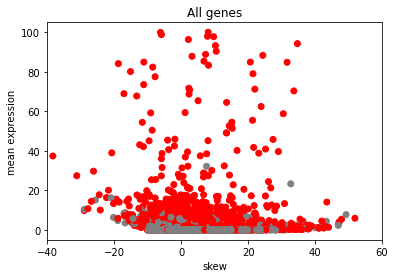

AE4
93.33333333333333 % of the outliers are memory genes


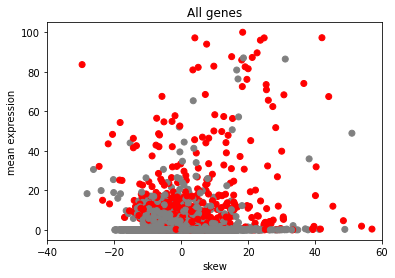

AE7
80.0 % of the outliers are memory genes


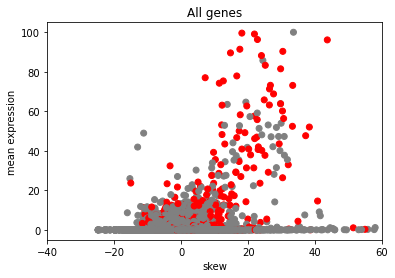

BIDDY_D0
85.71428571428571 % of the outliers are memory genes


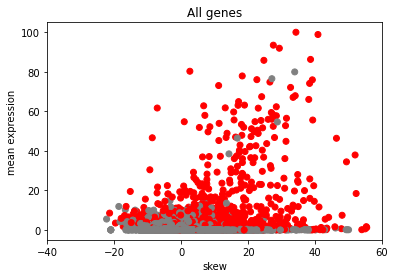

BIDDY_D0_2
84.21052631578948 % of the outliers are memory genes


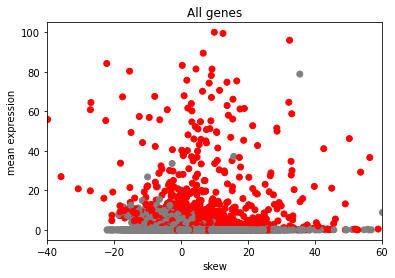

BIDDY_D6
100.0 % of the outliers are memory genes


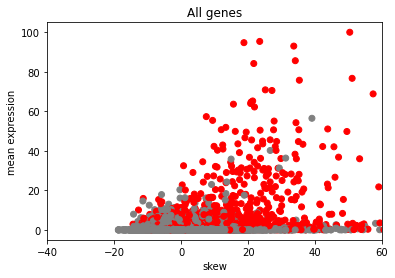

BIDDY_D6_2
66.66666666666667 % of the outliers are memory genes


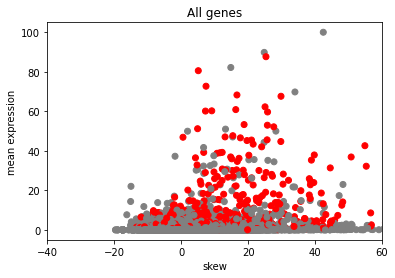

BIDDY_D15
90.0 % of the outliers are memory genes


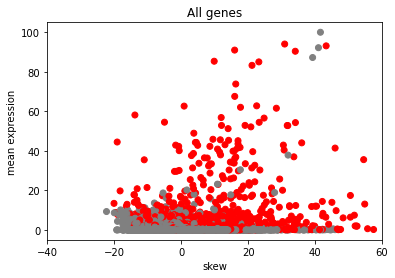

BIDDY_D15_2
71.42857142857143 % of the outliers are memory genes


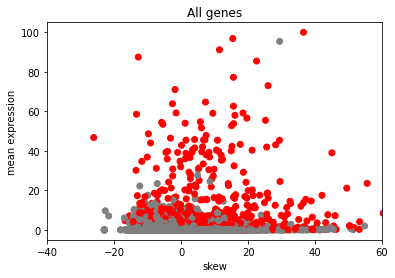

LK_D2_exp1_library_d2_1
85.71428571428571 % of the outliers are memory genes


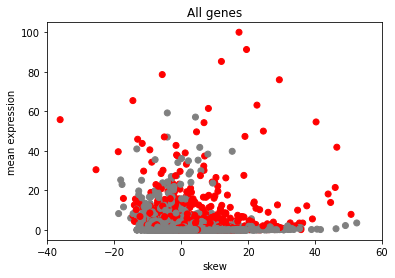

LK_D2_exp1_library_d2_2
100.0 % of the outliers are memory genes


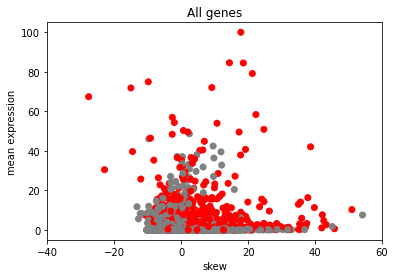

LK_D2_exp1_library_d2_3
83.33333333333333 % of the outliers are memory genes


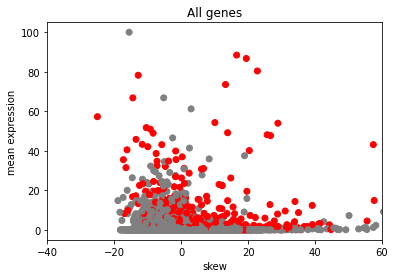

LK_LSK_D2_exp3_library_d2_1
60.0 % of the outliers are memory genes


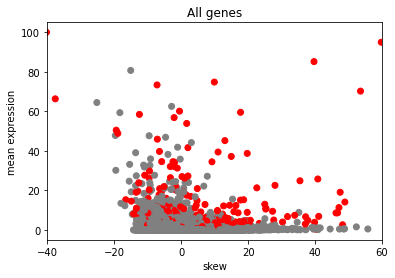

LK_LSK_D2_exp3_library_d2_2
100.0 % of the outliers are memory genes


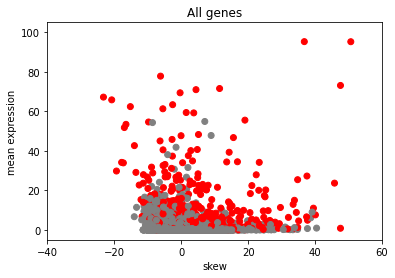

LK_LSK_D2_exp3_library_d2_3
100.0 % of the outliers are memory genes


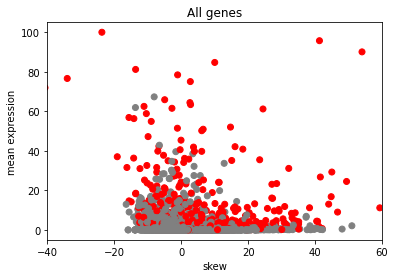

LK_LSK_D2_exp3_library_d2_4
100.0 % of the outliers are memory genes


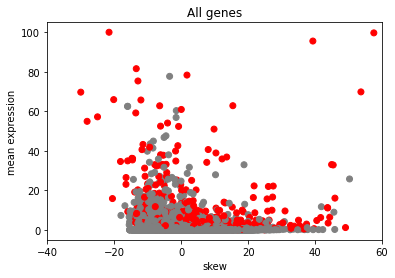

LK_LSK_D2_exp3_library_d2_5
80.0 % of the outliers are memory genes


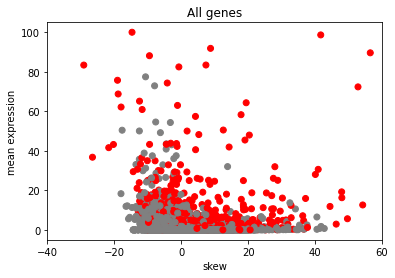

LSK_D2_exp1_library_LSK_d2_1
62.5 % of the outliers are memory genes


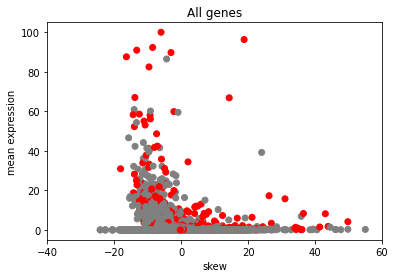

LSK_D2_exp1_library_LSK_d2_2
100.0 % of the outliers are memory genes


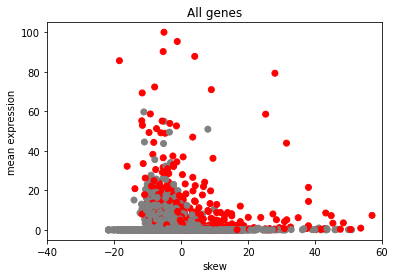

LSK_D2_exp1_library_LSK_d2_3
100.0 % of the outliers are memory genes


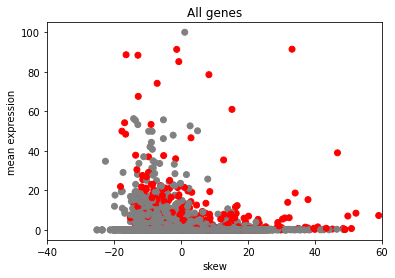

LSK_D2_exp2_library_d2A_1
100.0 % of the outliers are memory genes


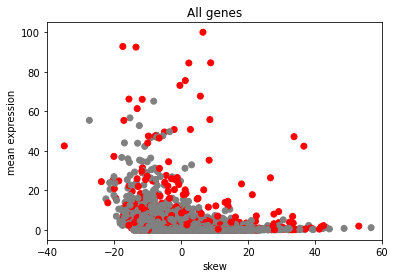

LSK_D2_exp2_library_d2A_2
83.33333333333333 % of the outliers are memory genes


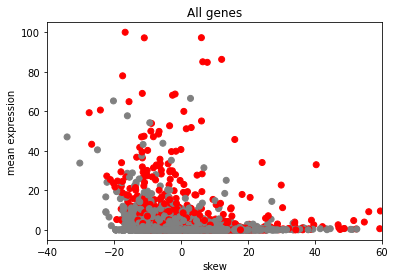

LSK_D2_exp2_library_d2A_3
100.0 % of the outliers are memory genes


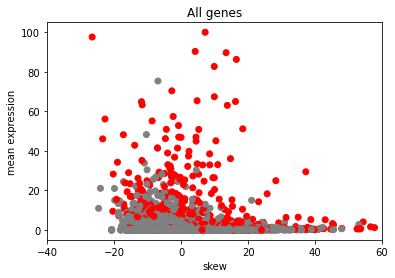

LSK_D2_exp2_library_d2A_4
100.0 % of the outliers are memory genes


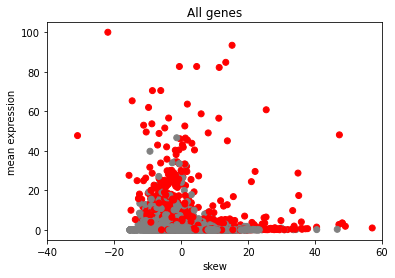

LSK_D2_exp2_library_d2A_5
100.0 % of the outliers are memory genes


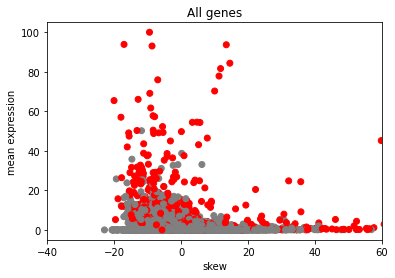

LSK_D2_exp2_library_d2B_1
100.0 % of the outliers are memory genes


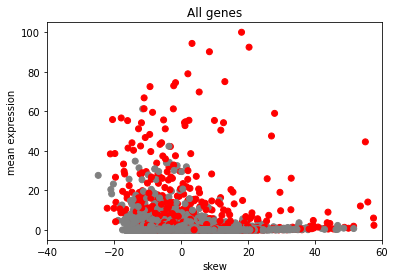

LSK_D2_exp2_library_d2B_2
85.71428571428571 % of the outliers are memory genes


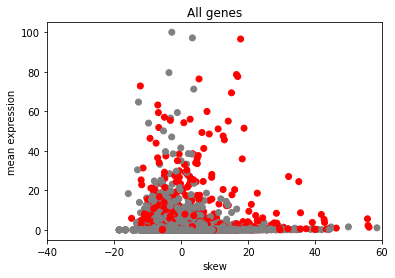

LSK_D2_exp2_library_d2B_3
100.0 % of the outliers are memory genes


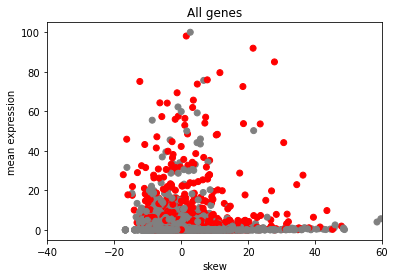

LSK_D2_exp2_library_d2B_4
100.0 % of the outliers are memory genes


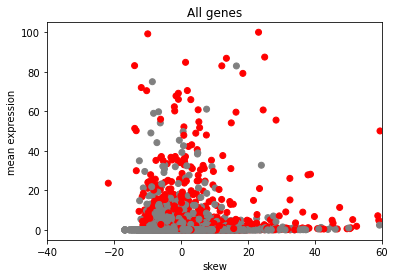

LSK_D2_exp2_library_d2B_5
100.0 % of the outliers are memory genes


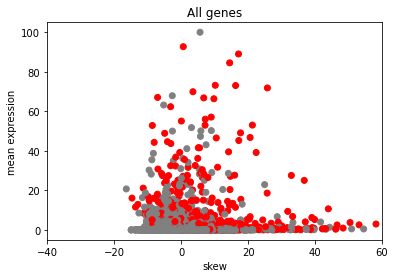

In [5]:
for i,charac in enumerate(charac_matrix):
    print(names[i])
    visualize_charac(charac)

In [17]:
np.max(charac_matrix[0]['Pou5f1'][charac_matrix[0]['Pou5f1'] != 0])

2.486

# Fuse charac data 

In [5]:
#Remove AE7, also keep BIDDYD15_2 for validation
val = [8]
data_to_fuse = [0,1,3,4,5,6,7] 

outliers = []
for data in charac_matrix:
    #Normalize skew_residuals, same for mean_expression after removing outliers
    charac_matrix[i], outlier_temp = remove_extreme_values(charac_matrix[i], k=200)
    outliers.append(outlier_temp)
    charac_matrix[i]['skew_residuals'], charac_matrix[i]['mean_expression'] = normalize(charac_matrix[i]['skew_residuals']), normalize(charac_matrix[i]['mean_expression'])

val_charac =  []
for i in val:
    val_charac.append(charac_matrix[i])

fused_charac = []
names_fused = []
for i in data_to_fuse:
    fused_charac.append(charac_matrix[i])
    names_fused.append(names[i])
    
fused = pd.concat(fused_charac)

# Logistic regression

In [6]:
feat = [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
score = fit_evaluate(charac_matrix[0], norm_matrix[0], families_matrix[0], 'logreg', [0,1], penalty = 'l2', lamb = 0.00001, verbose =True)

accuracy:  0.798975979650387
recovery memory genes:  0.38069368992895947
false postive:  1218
Precision and recovery clustering:  0.520618556701031 0.7417417417417418


## Fit logistic regression without CV on best found parameters

In [13]:
#Best parameters
lamb = 0.0000001

from imblearn.over_sampling import RandomOverSampler 
X = np.array(fused.drop(columns=['memory_gene']))
Y = np.array(fused['memory_gene'])

clf = LogisticRegression(C = lamb, max_iter=10000).fit(X,Y)

#Evaluate clustering
scores = []
for i in data_to_fuse:
    X = np.array(charac_matrix[i].drop(columns=['memory_gene']))
    Y = np.array(charac_matrix[i]['memory_gene'])
    
    #Evaluate fitted classifier
    acc = clf.score(X, Y)
    
    y = clf.predict(X)
    non_memory_gene = list(charac_matrix[i][Y == False].index)
    memory_gene = list(charac_matrix[i][Y == True].index)
    y = pd.DataFrame(y, index = charac_matrix[i].index, columns = ['pred'])

    y_non_mem = y.loc[non_memory_gene]
    y_mem = y.loc[memory_gene]
    recovery = np.sum(y_mem['pred'])/len(memory_gene)
    false_pos = np.sum(y_non_mem['pred'])
    
    score = [acc, recovery, false_pos]
    
    score.extend(predict_evaluate(charac_matrix[i], norm_matrix[i], families_matrix[i], clf, mult_pred=True, outliers = outliers[i]))
    scores.append(score)
    
scores_df = pd.DataFrame(scores, index = names_fused, columns= ['accuracy', 'recovery memory gene', 'FP', 'precision', 'recovery', 'ensembling precision', 'ensembling recovery'])
scores_df.to_csv('../data/binaryClass_scores/bestLogregfew.csv', index=True)

mean_score = np.mean(scores, axis = 0)
print('accuracy: ', mean_score[0])
print('recovery memory genes: ', mean_score[1])
print('false postive: ', mean_score[2])
print('100 clustering precision: ', mean_score[3])
print('100 clustering recovery: ', mean_score[4])

KeyboardInterrupt: 

# Validate on the dataset (BIDDY15_2) that was left out for validation

In [11]:
X = np.array(charac_matrix[8].drop(columns=['memory_gene']))
Y = np.array(charac_matrix[8]['memory_gene'])
    
#Evaluate fitted classifier
acc = clf.score(X, Y)
    
y = clf.predict(X)
non_memory_gene = list(charac_matrix[8][Y == False].index)
memory_gene = list(charac_matrix[8][Y == True].index)
y = pd.DataFrame(y, index = charac_matrix[8].index, columns = ['pred'])

y_non_mem = y.loc[non_memory_gene]
y_mem = y.loc[memory_gene]
recovery = np.sum(y_mem['pred'])/len(memory_gene)
false_pos = np.sum(y_non_mem['pred'])
    
score = [acc, recovery, false_pos]
    
score.extend(predict_evaluate(charac_matrix[8], norm_matrix[8], families_matrix[8], clf, mult_pred=True, outliers=outliers[8]))

In [12]:
print('accuracy: ', score[0])
print('recovery memory genes: ', score[1])
print('false postive: ', score[2])
print('100 clustering precision: ', score[3])
print('100 clustering recovery: ', score[4])

accuracy:  0.7025741755401633
recovery memory genes:  0.665743670886076
false postive:  4909
100 clustering precision:  0.8666666666666667
100 clustering recovery:  0.75


# Support vector machine

In [5]:
kernels = ['linear','rbf', 'poly', 'sigmoid']
for kern in kernels:

    print(kern)
    fit_evaluate(charac_matrix[0], norm_matrix[0], families_matrix[0], 'svm', [3,5], kernel = kern, verbose =True)

linear


KeyboardInterrupt: 

## RBF kernel

In [9]:
#Best parameters
lamb = 1

X = np.array(fused.drop(columns=['memory_gene']))
Y = np.array(fused['memory_gene'])

clf = SVC(C=lamb, kernel = 'rbf', class_weight = 'balanced').fit(X,Y)

#Evaluate clustering
scores = []
for i in data_to_fuse:
    X = np.array(charac_matrix[i].drop(columns=['memory_gene']))
    Y = np.array(charac_matrix[i]['memory_gene'])
    
    #Evaluate fitted classifier
    acc = clf.score(X, Y)
    
    y = clf.predict(X)
    non_memory_gene = list(charac_matrix[i][Y == False].index)
    memory_gene = list(charac_matrix[i][Y == True].index)
    y = pd.DataFrame(y, index = charac_matrix[i].index, columns = ['pred'])

    y_non_mem = y.loc[non_memory_gene]
    y_mem = y.loc[memory_gene]
    recovery = np.sum(y_mem['pred'])/len(memory_gene)
    false_pos = np.sum(y_non_mem['pred'])
    
    score = [acc, recovery, false_pos]
    
    score.extend(predict_evaluate(charac_matrix[i], norm_matrix[i], families_matrix[i], clf, mult_pred=True, outliers = outliers[i]))
    scores.append(score)
    
scores_df = pd.DataFrame(scores, index = names_fused, columns= ['accuracy', 'recovery memory gene', 'FP', 'precision', 'recovery', 'ensembling precision', 'ensembling recovery'])
scores_df.to_csv('../data/binaryClass_scores/bestSVM.csv', index=True)

mean_score = np.mean(scores, axis = 0)
print('accuracy: ', mean_score[0])
print('recovery memory genes: ', mean_score[1])
print('false postive: ', mean_score[2])
print('100 clustering precision: ', mean_score[3])
print('100 clustering recovery: ', mean_score[4])

KeyboardInterrupt: 

# Validate on the dataset (BIDDY15_2) that was left out for validation

In [ ]:
X = np.array(charac_matrix[8].drop(columns=['memory_gene']))
Y = np.array(charac_matrix[8]['memory_gene'])
    
#Evaluate fitted classifier
acc = clf.score(X, Y)
    
y = clf.predict(X)
non_memory_gene = list(charac_matrix[8][Y == False].index)
memory_gene = list(charac_matrix[8][Y == True].index)
y = pd.DataFrame(y, index = charac_matrix[8].index, columns = ['pred'])

y_non_mem = y.loc[non_memory_gene]
y_mem = y.loc[memory_gene]
recovery = np.sum(y_mem['pred'])/len(memory_gene)
false_pos = np.sum(y_non_mem['pred'])
    
score = [acc, recovery, false_pos]
    
score.extend(predict_evaluate(charac_matrix[8], norm_matrix[8], families_matrix[8], clf, mult_pred=True, outliers=outliers[8]))

In [ ]:
print('accuracy: ', score[0])
print('recovery memory genes: ', score[1])
print('false postive: ', score[2])
print('100 clustering precision: ', score[3])
print('100 clustering recovery: ', score[4])

# Neural Network (NN)

In [8]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, ConcatDataset
from sklearn.model_selection import KFold
import optuna

In [9]:
params = {
              'learning_rate': 0.08198,
              'n_fl': 26,
              'n_sl': 45,
              'batch_size': 65
              }

In [10]:
def build_model(params):
    
    return nn.Sequential(
        nn.Linear(18, params['n_fl']),
        nn.ReLU(),
        nn.Linear(params['n_fl'], params['n_sl']),
        nn.ReLU(),
        nn.Linear(params['n_sl'],1)
        
    )

In [11]:
#Configuration NN optimization 
num_epochs = 100
results = [] #store fold result

#Load data into torch.Dataset
labels = fused['memory_gene']*1
X = fused.drop(['memory_gene'], axis=1)

#Oversample the memory genes data points
ros = RandomOverSampler(random_state=42)
X, labels = ros.fit_resample(X, labels)
labels = np.expand_dims(labels, axis =1)
dataset = Dataset(np.array(X), labels)

train_size = int(0.8 * dataset.charac.shape[0])
test_size = dataset.charac.shape[0] - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Define data loaders for training and testing data in this fold
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=params['batch_size'])
testloader = torch.utils.data.DataLoader(test_dataset,batch_size=params['batch_size'])

# Initiate the NN
network = build_model(params)

# Initialize optimizer and loss function
optimizer = torch.optim.Adam(network.parameters(), lr=params['learning_rate'])
num_positives= np.sum(dataset.labels)
num_negatives = len(dataset.labels) - num_positives
pos_weight  = torch.as_tensor(num_negatives / num_positives, dtype=torch.float)
loss_function = nn.BCEWithLogitsLoss() 

# Run the training loop for defined number of epochs
accuracy = []
for epoch in range(0, num_epochs):
    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):

        # Get inputs
        inputs, targets = data
        inputs, targets = inputs.to(torch.float32),  targets.to(torch.float32)

        # Zero the gradients
        optimizer.zero_grad()

        # Perform forward pass
        outputs = network(inputs)

        # Compute loss
        loss = loss_function(outputs, targets)

        # Perform backward pass
        loss.backward()

        # Perform optimization
        optimizer.step()
                
with torch.no_grad():
            
# Iterate over the test data and generate predictions
    correct, total = 0, 0
    for i, data in enumerate(testloader, 0):
        # Get inputs
        inputs, targets = data
        inputs, targets = inputs.to(torch.float32), targets.to(torch.float32)

        #Compute accuracy on testing fold
        outputs = torch.sigmoid(network(inputs))
        outputs[outputs >= 0.5] = 1
        outputs[outputs < 0.5] = 0
        targets, outputs = targets.detach().numpy(), outputs.detach().numpy()

        correct += np.sum(targets == outputs)
        total += targets.shape[0]

    results.append(correct/total)


In [12]:
results

[0.5012290218681132]

In [18]:
inputs = torch.from_numpy(dataset.charac).to(torch.float32); targets= torch.from_numpy(dataset.labels).to(torch.float32)
outputs = torch.sigmoid(network(inputs))
outputs[outputs >= 0.5] = 1
outputs[outputs < 0.5] = 0
print(sum(outputs))

tensor([0.], grad_fn=<AddBackward0>)


In [19]:
NN = build_model(params)
train_and_evaluate(params,NN,fused)

0.5002839464315987